<a href="https://colab.research.google.com/github/deviandinifebrianti/PCVK_Genap_2023/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama   : Devi Andini Febrianti
## NIM    : 2141720189
## Pertemuan 11

# **MODUL11 – MetodeDeteksiObjek: TemplateMatching,Edge Detection,CornerDetection,GridDetection,ContourDetection**

In [ ]:
from google.colab import drive

#Akses google drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Object Detection**

Metode yang digunakan :

1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

**2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.**

cv.matchTemplate(), dengan parameter.

- image : citra input
- temptl : template yang dicari, ukurannya tidak boleh lebih besar dari citra input
- method : metode dari template matching

Jenis metode :

1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCDRR
4. TM_CCDRR_NORMED
5. TM_CCDEFF
6. TM_CCDEFF_NORMED

**1. TM_SQDIFF**

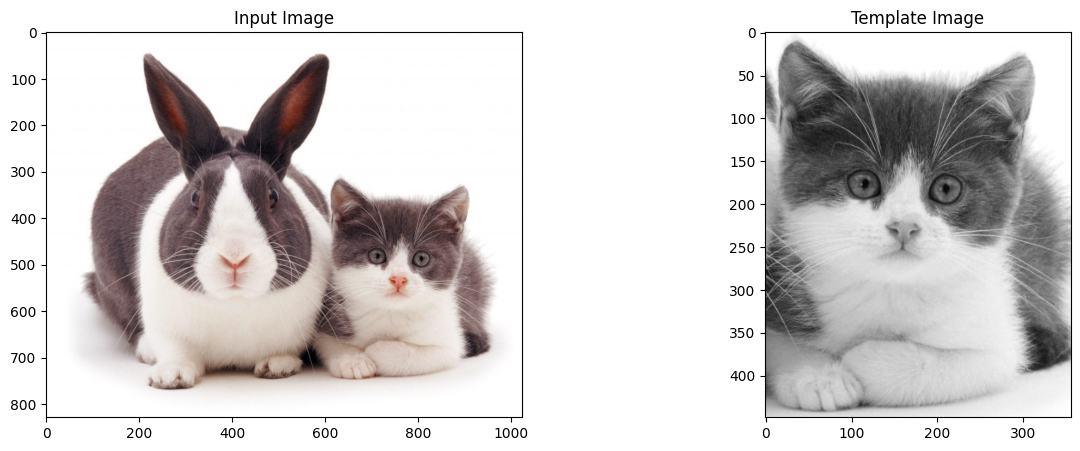

In [2]:
# TM_SQDIFF
img_input = cv.imread('/content/drive/MyDrive/PCVK/cats_and_bunnies.jpg')
img_input = cv.cvtColor(img_input, cv.COLOR_BGR2RGB)

img_template = cv.imread('/content/drive/MyDrive/PCVK/cat2_templatejpg.jpg',cv.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
for i, (image, title) in enumerate([(img_input, 'Input Image'), (img_template, 'Template Image')]):
    axes[i].imshow(image,cmap='gray' if i == 1 else None)
    axes[i].set_title(title)
plt.show()

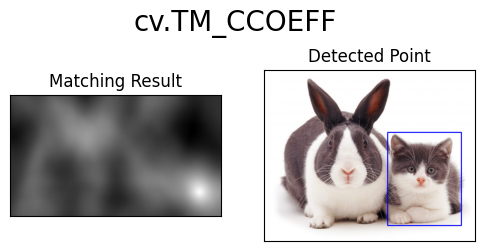

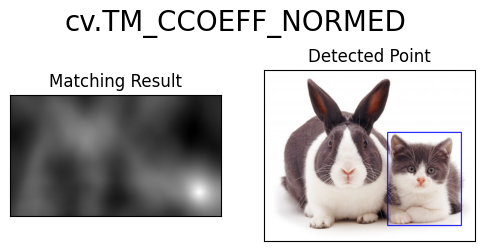

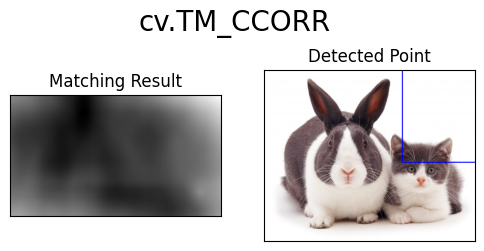

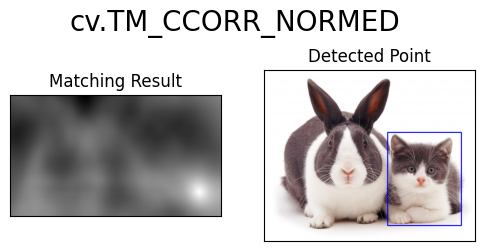

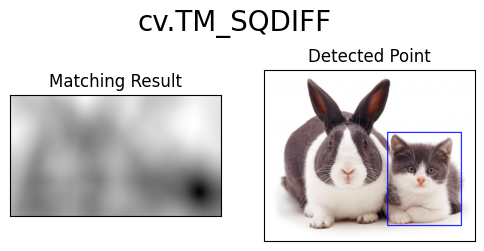

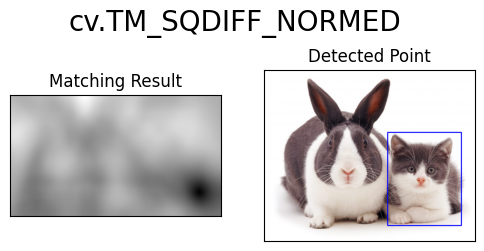

In [12]:
img = cv.cvtColor(img_input, cv.COLOR_BGR2GRAY)

h, w = img_template.shape
# Define template matching methods to be used
methods = [
    'cv.TM_CCOEFF',
    'cv.TM_CCOEFF_NORMED',
    'cv.TM_CCORR',
    'cv.TM_CCORR_NORMED',
    'cv.TM_SQDIFF',
    'cv.TM_SQDIFF_NORMED'
]

# Loop over each method
for meth in methods:
    # Create copy of input image
    img_copy = img_input.copy()

    # Get template matching method
    method = eval(meth)

    # Apply template matching
    res = cv.matchTemplate(img, img_template, method)

    # Get top-left corner of the best match
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Get bottom-right corner of the best match
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw rectangle around the best match
    cv.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 3)

    # Plot the results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
    ax1.imshow(res, cmap='gray')
    ax1.set_title('Matching Result')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.imshow(img_copy)
    ax2.set_title('Detected Point')
    ax2.set_xticks([])
    ax2.set_yticks([])
    fig.suptitle(meth, fontsize=20)
    plt.show()


**3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:**

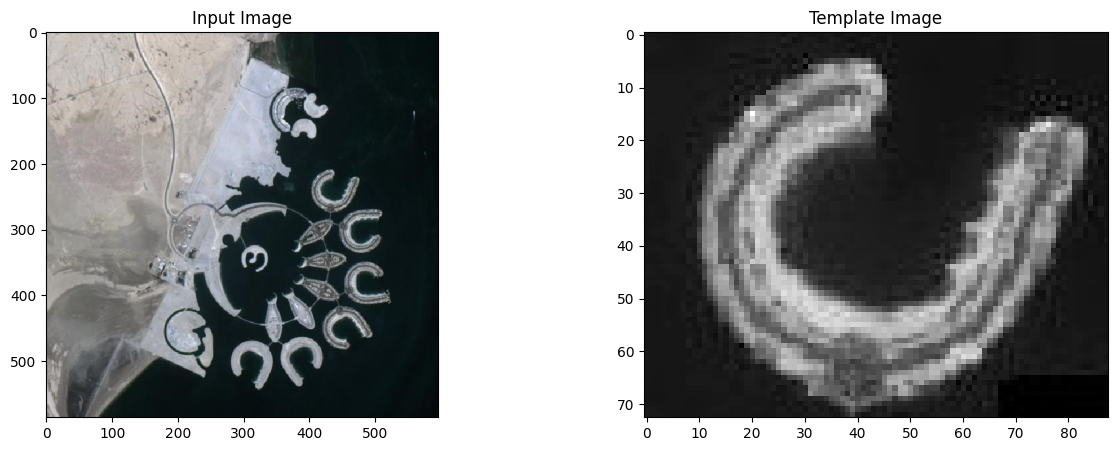

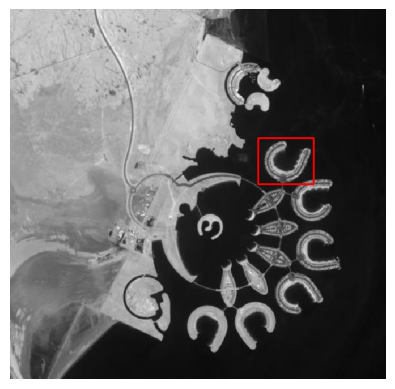

In [17]:
# TM_SQDIFF
img_input = cv.imread('/content/drive/MyDrive/PCVK/bahrain.jpg')
img_input = cv.cvtColor(img_input, cv.COLOR_BGR2RGB)

img_template = cv.imread('/content/drive/MyDrive/PCVK/bahrain-template.jpg',cv.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
for i, (image, title) in enumerate([(img_input, 'Input Image'), (img_template, 'Template Image')]):
    axes[i].imshow(image, cmap='gray' if i == 1 else None)
    axes[i].set_title(title)
plt.show()

import numpy as np
import cv2

# Fungsi untuk melakukan template matching
def template_matching(image, template, method):
    # Ambil dimensi gambar asli dan template
    ih, iw = image.shape[:2]
    th, tw = template.shape[:2]

    # Inisialisasi matriks untuk menyimpan hasil pencocokan
    result = np.zeros((ih - th + 1, iw - tw + 1))

    # Lakukan pencocokan template
    for y in range(ih - th + 1):
        for x in range(iw - tw + 1):
            roi = image[y:y+th, x:x+tw]
            if method == 'TM_SQDIFF':
                result[y, x] = np.sum((roi - template) ** 2)
            elif method == 'TM_SQDIFF_NORMED':
                numerator = np.sum((roi - template) ** 2)
                result[y, x] = numerator / (np.sqrt(np.sum(roi ** 2) * np.sum(template ** 2)))
            elif method == 'TM_CCORR':
                result[y, x] = np.sum(roi * template)
            elif method == 'TM_CCORR_NORMED':
                numerator = np.sum(roi * template)
                result[y, x] = numerator / (np.sqrt(np.sum(roi ** 2) * np.sum(template ** 2)))
            elif method == 'TM_CCOEFF':
                result[y, x] = np.sum((roi - roi.mean()) * (template - template.mean()))
            elif method == 'TM_CCOEFF_NORMED':
                numerator = np.sum((roi - roi.mean()) * (template - template.mean()))
                result[y, x] = numerator / (np.sqrt(np.sum((roi - roi.mean()) ** 2) * np.sum((template - template.mean()) ** 2)))

    return result

# Load gambar asli dan template
image = cv2.imread('/content/drive/MyDrive/PCVK/bahrain.jpg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('/content/drive/MyDrive/PCVK/bahrain-template.jpg', cv2.IMREAD_GRAYSCALE)

# Pilih metode template matching
method = 'TM_SQDIFF'  # Ganti dengan metode yang sesuai

# Lakukan template matching
result = template_matching(image, template, method)

# Temukan posisi terbaik
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Jika menggunakan metode TM_SQDIFF atau TM_SQDIFF_NORMED, gunakan min_loc
if method in ['TM_SQDIFF', 'TM_SQDIFF_NORMED']:
    match_loc = min_loc
else:
    match_loc = max_loc

# Gambar kotak pada gambar asli untuk menunjukkan posisi hasil pencocokan
matched_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Konversi gambar ke mode warna BGR
cv2.rectangle(matched_image, match_loc, (match_loc[0] + template.shape[1], match_loc[1] + template.shape[0]), (0, 0, 255), 2)

# Tampilkan gambar hasil dengan Matplotlib
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:**

**a. Sobel Edge Detection**

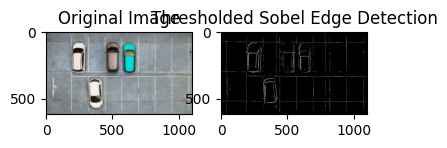

In [19]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/PCVK/car-park.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Combine the horizontal and vertical Sobel results
sobel = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Threshold the Sobel result to get binary edges
threshold = 100
sobel_binary = cv2.threshold(sobel, threshold, 255, cv2.THRESH_BINARY)[1]

# Display the original image, Sobel result, and thresholded Sobel result
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(sobel_binary, cmap='gray')
plt.title('Thresholded Sobel Edge Detection')
plt.show()


**b. Canny Edge Detection**

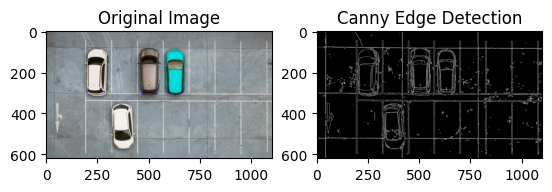

In [21]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/PCVK/car-park.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150)

# Display the original image and the Canny edge detection result
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


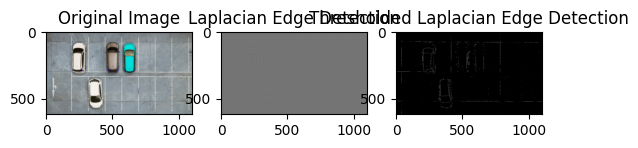

In [23]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/PCVK/car-park.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

# Threshold the Laplacian result to get binary edges
threshold = 100
laplacian_binary = cv2.threshold(laplacian, threshold, 255, cv2.THRESH_BINARY)[1]

# Display the original image, Laplacian result, and thresholded Laplacian result
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.subplot(1, 3, 3)
plt.imshow(laplacian_binary, cmap='gray')
plt.title('Thresholded Laplacian Edge Detection')
plt.show()
